# Treinamento do Modelo

Com o dataset de landmarks pronto, a próxima etapa é a criação e o treinamento do modelo. Para este projeto, optou-se por uma Rede Neural Perceptron de Múltiplas Camadas (MLP). O modelo será treinado com os valores dos landmarks para classificar as diferentes posições de mão.
> **Importante**: Este projeto lida com um dataset estático, onde cada imagem corresponde a uma letra do alfabeto em LIBRAS. Devido à natureza estática da coleta, algumas letras não foram incluídas no dataset. Portanto, o modelo foi treinado e avaliado apenas com base nas imagens estáticas disponíveis.

#### Preparação do Ambiente de Drive

Para fins de conexão com Google Drive, nessa seção tem a preparação da conexão com o serviço.

In [21]:
# Montagem do drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Carregamento do Dataset

In [22]:
from pathlib import Path
path_dataset = Path("/content/drive/MyDrive/Colab Notebooks/datasets/alphalibras/df_libras_landmarks.csv")

In [23]:
import pandas as pd
df_libras_landmarks = pd.read_csv(path_dataset)

Uma vez com o dataset carregado, abaixo tem-se uma amostra de como os dados estão organizados.

Abaixo segue algumas informações sobre o dataset:

In [24]:
tamanho_original = len(df_libras_landmarks)
print(f"O total de linhas no DataFrame original é: {tamanho_original}")

O total de linhas no DataFrame original é: 32661


In [25]:
df_libras_landmarks.head(20)

,Unnamed: 0,label,landmarks
0,0,A,"[0.0, 0.0, 0.0, -0.33296008560803314, -0.16070..."
1,1,A,"[0.0, 0.0, 0.0, -0.35644034016925447, -0.12055..."
2,2,A,"[0.0, 0.0, 0.0, -0.3758913066102671, -0.158168..."
3,3,A,"[0.0, 0.0, 0.0, -0.38806661691919003, -0.13577..."
4,4,A,"[0.0, 0.0, 0.0, -0.38245503947281784, -0.12714..."
5,5,A,"[0.0, 0.0, 0.0, -0.3973856632972975, -0.118951..."
6,6,A,"[0.0, 0.0, 0.0, -0.37178776428654947, -0.11291..."
7,7,A,"[0.0, 0.0, 0.0, -0.3873291160841433, -0.109510..."
8,8,A,"[0.0, 0.0, 0.0, -0.3849290013928529, -0.120483..."
9,9,A,"[0.0, 0.0, 0.0, -0.3885912209548652, -0.116387..."


In [26]:
print("Tipo de dado da coluna 'landmarks':", df_libras_landmarks['landmarks'].dtype)

Tipo de dado da coluna 'landmarks': object


In [27]:
print("Primeiro valor da coluna 'landmarks':\n", df_libras_landmarks['landmarks'].iloc[0])

Primeiro valor da coluna 'landmarks':
 [0.0, 0.0, 0.0, -0.33296008560803314, -0.160703444693051, -0.05618833437161321, -0.4998571795935292, -0.48581435987841837, -0.06663177444970673, -0.49211072550323337, -0.7821645980363194, -0.0920418119666392, -0.5072742760512868, -1.0, -0.0955207494264799, -0.2840804187790615, -0.7591753209248607, 0.06104229399606988, -0.27944581211841674, -0.98942666352765, -0.07618018931993353, -0.30041434292190644, -0.760869984463115, -0.14260072968581472, -0.2913046622038777, -0.6167796069821531, -0.15776182408675057, -0.07593928653838526, -0.7474967962224925, 0.02941539399733304, -0.07189581860836315, -0.983073637577793, -0.09739599825757479, -0.11467987410179739, -0.7032387925487202, -0.11252310296122908, -0.10274700172013469, -0.5887338896892088, -0.08283928498891706, 0.12090471256399044, -0.7003111691483802, -0.0317768018798018, 0.12361349195659903, -0.9041685209061264, -0.15893786371404622, 0.06372539973729362, -0.6453524212438376, -0.09652513166077534, 0

## Preparação do Dataset

### Funções Auxiliares

O dataset possui um campo de texto que corresponde a uma lsita dos landmarks. Porém, por conta de se tratar de um arquivo `CSV`, esse campo vem em formato de string. A função abaixo faz essa verificaçãoe  converte para uma lista Python.

In [28]:
from ast import literal_eval

# Função para converter a string em lista, tratando possíveis erros
def converte_lista_landmarks(landmark_string: str): # def parse_landmarks(landmark_string):
    """Converte a string de landmarks em uma lista reconhecida pelo Python.
    Args:
        landmark_string (str): Uma lista de números (inteiros ou floats).

    Returns:
        list: Para essa função em específico, retorna uma lista reconhecida pelo Python.
    """

    if not isinstance(landmark_string, str): # Faz uma verificação adicional para garantir que a entrada é uma string.
        return None
    try:
        return literal_eval(landmark_string)
    except (ValueError, SyntaxError): #Se durante a tentativa a conversão falhar, a função para e retorna 'None'.
        return None

Aplicando a função no DataFrame:

In [29]:
df_libras_landmarks['landmarks'] = df_libras_landmarks['landmarks'].apply(converte_lista_landmarks)

# Remove as linhas onde a conversão falhou
df_libras_landmarks = df_libras_landmarks.dropna(subset=['landmarks'])

In [30]:
print(f"O total de linhas no DataFrame original é: {tamanho_original}")
print(f"Total de linhas removidas após o pré-processamento: {tamanho_original - len(df_libras_landmarks)}")

O total de linhas no DataFrame original é: 32661
Total de linhas removidas após o pré-processamento: 0


### Separação em Sub Datasets

Nesse projeto, os dados do dataset foram separado da seguinte forma:
- 60% para treino
- 20% para validação
- 20% para teste

Iniciando com a separação dos datasets de treino, teste e validação:

In [31]:
# Bibliotecas necessárias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separação Inicial entre os dados de features 'X' e os rótulos das letras 'Y'
X = np.array(df_libras_landmarks['landmarks'].tolist())
y = df_libras_landmarks['label']

# Tranformação dos rótulos em números represetando as classes
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Divisão Inicial para separação do dataset de Teste (20% para o teste)
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# Segunda divisão a partir do dataset X_temp e y_temp para as partes de treino (60%) e validação (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25, # 25% de 80% de dados restantes correspondem a 20% do dataset original.
    random_state=42,
    stratify=y_temp
)

No momento da criação do dataset de landmarks, houve erros na extração desses pontos seja com a extração errada de pontos o que acarretou em anomalias desses valores ou as vezes do não reconhecimento da mão na imagem. Por conta disso, algumas classes tiveram mais exemplares de landmarks do que outras o que acarretou em um desbalenceamento dessas classes. Por conta disso, abaixo tem-se o código para tentar dar uma equilibrada nessas classes para que o modelo não aprenda mais um símbolo do que outro.

In [32]:
# Importação da biblioteca necessária
from sklearn.utils.class_weight import compute_class_weight

# Calcular os Pesos das Classes
classes_unicas = np.unique(y_train) # Lista todas as letras

# Calcula os pesos de cada classe para que o dataset fique de forma balenceada no momento do treino.
pesos_calculados = compute_class_weight(
    class_weight='balanced',
    classes=classes_unicas, y=y_train
)

pesos_de_classe = dict(zip(classes_unicas, pesos_calculados)) # Para cada letra, tem-se o peso dela aplicado no treinamento.

Logo, para esse projeto, o peso de cada letra pode ser visualizado a seguir:

In [33]:
print("Pesos calculados para cada classe:")
for chave, valor in enumerate(pesos_de_classe):
    print(f"{encoder.classes_[chave]}: {pesos_de_classe[valor]:.3f}")

Pesos calculados para cada classe:
A: 0.924
B: 0.700
C: 6.059
D: 1.057
E: 0.703
F: 0.749
G: 0.835
I: 1.201
L: 1.488
M: 1.731
N: 1.715
O: 2.232
P: 5.425
Q: 0.766
R: 0.964
S: 0.707
T: 0.719
U: 0.928
V: 0.707
W: 0.933
Y: 0.708


O resumo geral do processo está abaixo:

In [34]:
print("========================= Formato dos conjuntos de dados =========================")
print(f"Dados de Treino: {X_train.shape}, Rótulos de Treino: {y_train.shape}")
print(f"Dados de Validação: {X_val.shape}, Rótulos de Validação: {y_val.shape}")
print(f"Dados de Teste: {X_test.shape}, Rótulos de Teste: {y_test.shape}")

========================= Formato dos conjuntos de dados =========================
Dados de Treino: (19596, 63), Rótulos de Treino: (19596,)
Dados de Validação: (6532, 63), Rótulos de Validação: (6532,)
Dados de Teste: (6533, 63), Rótulos de Teste: (6533,)


## Preparando processo de Treinamento

### Configuração do Ambiente de Treinamento

Utilização das GPU presente no Google Colab para acelerar o processo de treinamento.

In [35]:
# Biblioteca necessária durante todo o projeto
import tensorflow as tf

# Configuração do Ambiente e Verificação da GPU
print("Versão do TensorFlow:", tf.__version__)

# Verifica se a GPU está disponível e a seleciona
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Configura TensorFlow para usar a primeira GPU encontrada
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f"GPU disponível: {len(gpus)} Física(s), {len(logical_gpus)} Lógica(s)")
        print(f"Usando a GPU: {gpus[0].name}")
    except RuntimeError as e:
        print(e)
else:
    print("Nenhuma GPU encontrada. O treinamento será executado na CPU.")

Versão do TensorFlow: 2.19.0
GPU disponível: 1 Física(s), 1 Lógica(s)
Usando a GPU: /physical_device:GPU:0


## Criação do Modelo e Treinamento

Para esse projeto, alguns hiperparâmetros foram selecionados. Os parâmetros no treinamento estão listados abaixo:

### Construção do Modelo

O modelo contruído no projeto consiste em uma arquitetura MLP composta de duas camadas ocultas.

In [36]:
# Hiperparâmetros utilizados na arquiteura do modelo
INPUT_SHAPE = (X_train.shape[1],)       # Formato da entrada (63 neurônios).
NUM_CLASSES = len(np.unique(y_encoded)) # Número de classes (21).

# Construção da Arquitetura do Modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=INPUT_SHAPE), # Camada de entrada com tamanho igual a 63
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Mostra um resumo da arquitetura
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 21)             │         1,365 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,813 (69.58 KB)

 Trainable params: 17,813 (69.58 KB)

 Non-trainable params: 0 (0.00 B)

Agora que a arquitetura do modelo está definida, é necessária compilar a mesma. Esta etapa configura o processo de treinamento. Os parâmetros utilizados esntão listados abaixo:
* **Otimizador (`optimizer`):** O algoritmo que ajustará os pesos da rede para minimizar o erro. Para o projeto é o `Adam` e a `learning_rate` (taxa de aprendizado) controla o tamanho dos "passos" que o otimizador dá.
* **Função de Perda (`loss`):** A métrica que o otimizador tentará minimizar. Como nosso problema é de classificação com múltiplas classes e nossos rótulos são números inteiros (ex: 0, 1, 2...), esse projeto utiliza a `sparse_categorical_crossentropy`.
* **Métricas (`metrics`):** As métricas que será usada para monitorar o desempenho do modelo durante o treinamento. A `accuracy` (acurácia) dará a porcentagem de imagens que foram classificadas corretamente.

In [37]:
# Hiperparâmetro utilizado na compilação do modelo
LEARNING_RATE = 0.001 # Taxa de aprendizagem.

# Compilação do Modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

No caso, com o projeto em construção, foi deicido então aplicar uma técnica de salvamento do melhor modelo para que durante o treinamento, uma versão mais ruim não sobrescreva um modelo com uma acurária melhor. Além disso, com o decorrer do treinamento, um modelo pode ficar estável com relação ao aprendizado. Nesse caso, tem-se uma espécie de paciêcnia aplciado ao projeto apra que depois de um certo período sem evolução, o treinamento pare.

In [38]:
# Hiperparâmetro utilizado na configuração do Callback.

MODEL_CHECKPOINT_PATH = 'melhor_modelo_libras.keras' # Nome do melhor modelo que será salvo.
PATIENCE = 15 # Paciência para o EarlyStopping.

""" Configuração dos Callbacks """
# Salva o melhor modelo que encontrar durante o treino
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=MODEL_CHECKPOINT_PATH,
    save_best_only=True,
    monitor='val_accuracy', # Salva com base na acurácia da validação
    mode='max'
)

# Para o treinamento se o modelo não melhorar após 'patience' épocas
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=PATIENCE,
    restore_best_weights=True # Restaura os pesos da melhor época ao final
)

### Treinamento do Modelo

Uma vez com tudo definido, agora o processo final consiste em treinar o modelo.

In [39]:
# Hiperparâmetro utilizado no treinamento do modelo.

EPOCHS = 200 # Um número alto, pois o EarlyStopping vai parar quando for o ideal.
BATCH_SIZE = 64 # Tamanho do lote a ser enviado.

# Treinamento do Modelo
print("Iniciando o treinamento do modelo...")
history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val),
    class_weight=pesos_de_classe, # Utilizando os pesos de cada classe.
    callbacks=[model_checkpoint, early_stopping] # Processo de salvamento dos modelos e verificação da evolução do treinamento.
)
print("Treinamento concluído.")

Iniciando o treinamento do modelo...
Epoch 1/200
307/307 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.2525 - loss: 2.3434 - val_accuracy: 0.8019 - val_loss: 0.8155
Epoch 2/200
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6824 - loss: 0.9437 - val_accuracy: 0.8670 - val_loss: 0.4593
Epoch 3/200
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7915 - loss: 0.6415 - val_accuracy: 0.9074 - val_loss: 0.3560
Epoch 4/200
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8346 - loss: 0.4978 - val_accuracy: 0.9235 - val_loss: 0.2933
Epoch 5/200
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8654 - loss: 0.4309 - val_accuracy: 0.9270 - val_loss: 0.2620
Epoch 6/200
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8784 - loss: 0.3743 - val_accuracy: 0.9561 - val_loss: 0.2250
Epoch 7/200
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8961 - loss: 0.3335 - val_accuracy: 0.9507 - val_loss: 0.2130
Epoch 8/200
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accu

### Avaliação do Modelo

Com o fim do treinamento, abaixo tem-se os gráficos de Acurácia e Perda que mostram a evolução do treinamento do modelo.

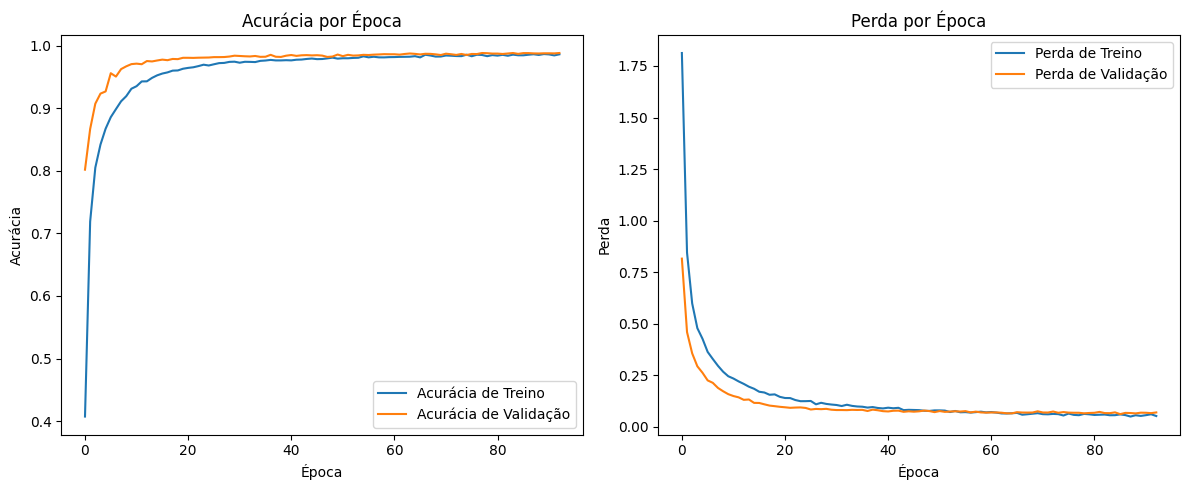

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Gráfico de Acurária
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico de Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda por Época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

Por fim, a avaliação do modelo no conjunto de teste (conjunto nunca visto pelo modelo).

In [42]:
print("Carregando o melhor modelo salvo")
best_model = tf.keras.models.load_model(MODEL_CHECKPOINT_PATH)

print("Avaliando o modelo no conjunto de teste (dados nunca vistos)...")
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%")
print(f"Perda no conjunto de teste: {test_loss:.4f}")

Carregando o melhor modelo salvo
Avaliando o modelo no conjunto de teste (dados nunca vistos)...
Acurácia no conjunto de teste: 99.05%
Perda no conjunto de teste: 0.0565


Por fim, a matriz de confusão abaixo mostra a quantidade de exemplares verdadeiros junto com os prvistos.


Gerando Matriz de Confusão...
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


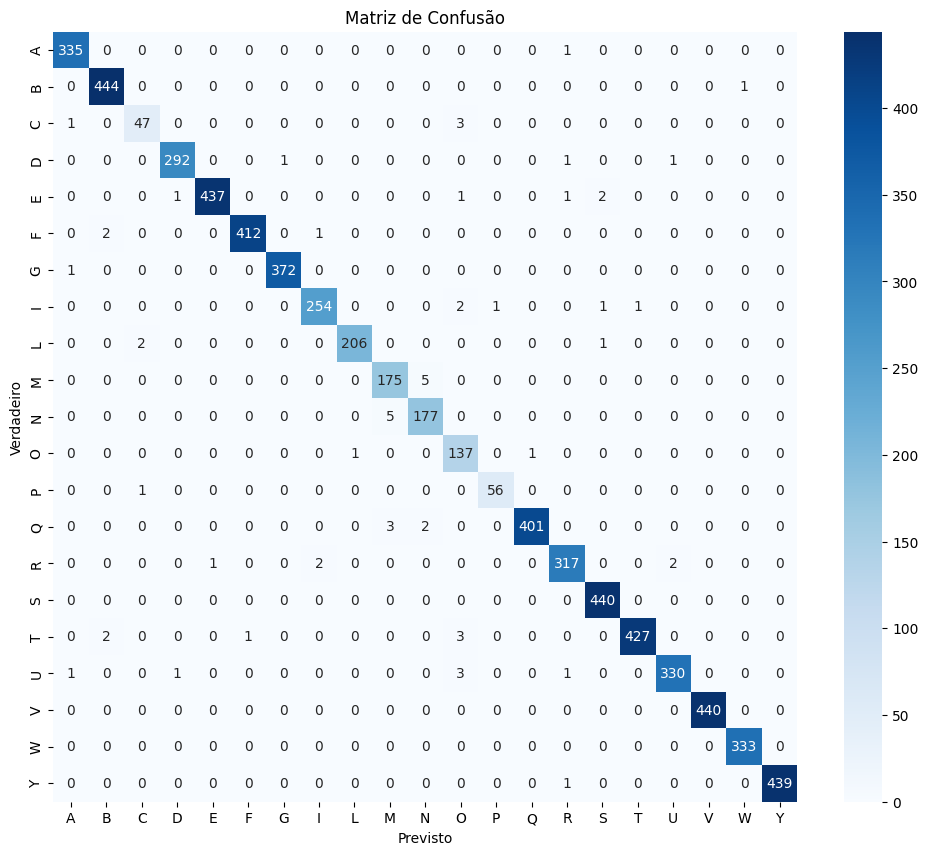

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matriz de Confusão
print("\nGerando Matriz de Confusão...")
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Pega os nomes das classes do LabelEncoder
class_names = encoder.classes_

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

E por fim, o relatório de classificação das classes.

In [45]:
from sklearn.metrics import classification_report
print("Relatório de Classificação Detalhado:")
print(classification_report(y_test, y_pred, target_names=class_names))

Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

           A       0.99      1.00      0.99       336
           B       0.99      1.00      0.99       445
           C       0.94      0.92      0.93        51
           D       0.99      0.99      0.99       295
           E       1.00      0.99      0.99       442
           F       1.00      0.99      1.00       415
           G       1.00      1.00      1.00       373
           I       0.99      0.98      0.98       259
           L       1.00      0.99      0.99       209
           M       0.96      0.97      0.96       180
           N       0.96      0.97      0.97       182
           O       0.92      0.99      0.95       139
           P       0.98      0.98      0.98        57
           Q       1.00      0.99      0.99       406
           R       0.98      0.98      0.98       322
           S       0.99      1.00      1.00       440
           T       1.00      0.99      0.99

## Salvamento do Modelo

Por fim, apra utilizar o modelo, tem-se abaixo o código para salvar tanto o modelo normal como sua versão lite para utilizar em dispositivos mais limitados utilizando a API do TensorFlow Lite.

In [46]:
dir_base = Path('/content/drive/MyDrive/Colab Notebooks/Visão Computacional/AlphaLibras/models')# Diretório do Google Drive
dir_base.mkdir(parents=True, exist_ok=True)

Salvando o modelo padrão

In [47]:
# Salvando o Modelo Padrão para Inferência Futura
caminho_modelo_keras = dir_base / 'modelo_completo.keras'
model.save(caminho_modelo_keras)
print(f"Modelo padrão salvo com sucesso em: '{caminho_modelo_keras}'")

Modelo padrão salvo com sucesso em: '/content/drive/MyDrive/Colab Notebooks/Visão Computacional/AlphaLibras/models/modelo_completo.keras'


Convertendo o modelo para uma versão lite.

In [48]:
# Convertendo e Salvando a Versão TensorFlow Lite

converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Aplicando otimizações padrões (reduz o tamanho e acelera a inferência)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Converte o modelo
modelo_tflite = converter.convert()

# Salva o arquivo .tflite no mesmo diretório
caminho_modelo_lite = dir_base / 'modelo_libras.tflite'
with open(caminho_modelo_lite, 'wb') as f:
    f.write(modelo_tflite)

print(f"Modelo TFLite salvo com sucesso em: '{caminho_modelo_lite}'")

Saved artifact at '/tmp/tmpadzvp76e'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 63), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 21), dtype=tf.float32, name=None)
Captures:
  133724309302032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133724309304528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133724309305872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133724309304144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133724309303952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133724309306064: TensorSpec(shape=(), dtype=tf.resource, name=None)
Modelo TFLite salvo com sucesso em: '/content/drive/MyDrive/Colab Notebooks/Visão Computacional/AlphaLibras/models/modelo_libras.tflite'
